In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Make a DataFrame

In [7]:
car_sales = pd.read_csv('~/sample_project/Pandas/car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [8]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2021", periods=1000))
ts

2021-01-01    0.403781
2021-01-02    0.463884
2021-01-03   -1.017604
2021-01-04   -0.097801
2021-01-05    0.949105
                ...   
2023-09-23    0.353313
2023-09-24   -0.106216
2023-09-25    0.117098
2023-09-26    0.111898
2023-09-27   -0.951619
Freq: D, Length: 1000, dtype: float64

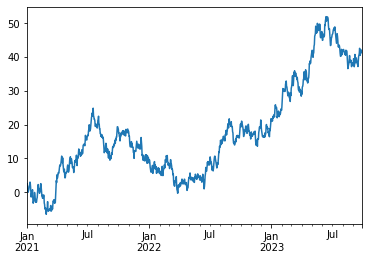

In [9]:
ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2021", periods=1000))

ts = ts.cumsum()
ts.plot();

In [10]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [11]:
car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')
car_sales

<ipython-input-11-ff2a0abc9b5e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales['Price'] = car_sales['Price'].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


Remove last two zeros

In [12]:
type(car_sales['Price'])

pandas.core.series.Series

In [13]:
type(car_sales['Price'][0])

str

In [14]:
type(car_sales['Price'][1])

str

In [15]:
car_sales['Price'] = car_sales['Price'].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [16]:
car_sales['Sale Date'] = pd.date_range('30/06/21', periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2021-06-30
1,Honda,Red,87899,4,5000,2021-07-01
2,Toyota,Blue,32549,3,7000,2021-07-02
3,BMW,Black,11179,5,22000,2021-07-03
4,Nissan,White,213095,4,3500,2021-07-04
5,Toyota,Green,99213,4,4500,2021-07-05
6,Honda,Blue,45698,4,7500,2021-07-06
7,Honda,Blue,54738,4,7000,2021-07-07
8,Toyota,White,60000,4,6250,2021-07-08
9,Nissan,White,31600,4,9700,2021-07-09


In [17]:
car_sales['Total sales'] = car_sales['Price'].cumsum()

In [18]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total sales
0,Toyota,White,150043,4,4000,2021-06-30,4000
1,Honda,Red,87899,4,5000,2021-07-01,40005000
2,Toyota,Blue,32549,3,7000,2021-07-02,400050007000
3,BMW,Black,11179,5,22000,2021-07-03,40005000700022000
4,Nissan,White,213095,4,3500,2021-07-04,400050007000220003500
5,Toyota,Green,99213,4,4500,2021-07-05,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2021-07-06,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2021-07-07,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2021-07-08,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2021-07-09,40005000700022000350045007500700062509700


This is because the 'Price' data is still a string

In [19]:
type(car_sales['Price'][0])

str

In [20]:
car_sales['Total sales'] = car_sales['Price'].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total sales
0,Toyota,White,150043,4,4000,2021-06-30,4000
1,Honda,Red,87899,4,5000,2021-07-01,9000
2,Toyota,Blue,32549,3,7000,2021-07-02,16000
3,BMW,Black,11179,5,22000,2021-07-03,38000
4,Nissan,White,213095,4,3500,2021-07-04,41500
5,Toyota,Green,99213,4,4500,2021-07-05,46000
6,Honda,Blue,45698,4,7500,2021-07-06,53500
7,Honda,Blue,54738,4,7000,2021-07-07,60500
8,Toyota,White,60000,4,6250,2021-07-08,66750
9,Nissan,White,31600,4,9700,2021-07-09,76450


# Plot the 'Total sales'

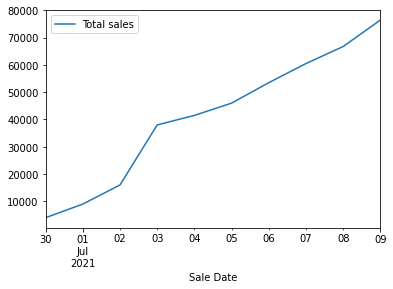

In [23]:
car_sales.plot(x='Sale Date', y='Total sales');

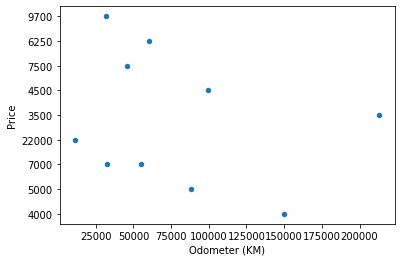

In [26]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');

In [27]:
#reassign price column to an int

car_sales['Price'] = car_sales['Price'].astype(int)

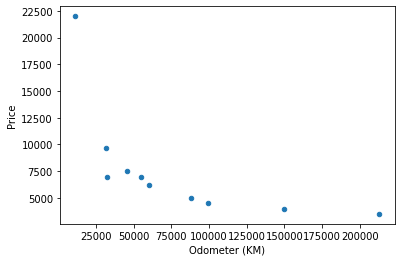

In [28]:
car_sales.plot(x='Odometer (KM)', y='Price', kind='scatter');